# Rayleigh-Bénard convection of a Darcy fluid in a porous rectangle

problem specification
$$
\begin{cases}
\mathcal{L} = \mathcal{L}_\Omega & \text{scaling with rectangle depth and convective speed} \\
\mathcal{U} = K_{\text{ref}}\,g\Delta\rho/\mu_{\text{ref}} \\
\mathcal{T} = \phi_{\text{ref}}\mathcal{L}/\mathcal{U} \\
\Omega = [0, L_x] \times [0, 1] & \text{aspect ratio } L_x=\mathcal{O}(1)\\
\textbf{e}_g=-\textbf{e}_y & \text{gravity acting downwards}\\ 
\phi = 1 & \text{constitutive relations} \\
\mathsf{D} = \mathsf{I} \\ 
\mathsf{K} = \mathsf{I}\\ 
\mu = 1 \\
\rho(c) = -c \\
c_0(x,y)=1-y+\mathcal{N}(x,y) & \text{diffusive base state plus noise} \\
c_{\text{D}}(x,y=0)=1 & \text{prescribed temperature on upper and lower boundaries} \\
c_{\text{D}}(x,y=1)=0 \\
c_{\text{N}}(x=0,y)=0 & \text{no-flux on left and right boundaries}\\
c_{\text{N}}(x=L_x,y)=0 \\
\psi_{\text{D}}\vert_{\partial\Omega}=0 & \text{no-penetration on entire boundary}
\end{cases}
$$

In [ ]:
from lucifex.fdm import AB2, CN
from lucifex.sim import run
from lucifex.utils import grid, spacetime_grid
from lucifex.viz import plot_colormap, create_animation
from lucifex.io import write, get_ipynb_file_name

from py.darcy_convection_rayleigh_benard import darcy_convection_rayleigh_benard_rectangle


simulation = darcy_convection_rayleigh_benard_rectangle(
    Lx=2.0,
    Nx=64,
    Ny=64,
    cell='quadrilateral', 
    Ra=500.0, 
    c_eps=1e-3, 
    c_freq=(12, 8), 
    c_seed=(123, 456), 
    D_adv=AB2,
    D_diff=CN,
)

n_stop = 200
dt_init = 1e-6
n_init = 5
run(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

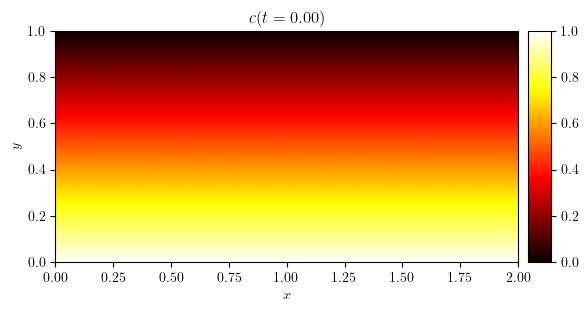

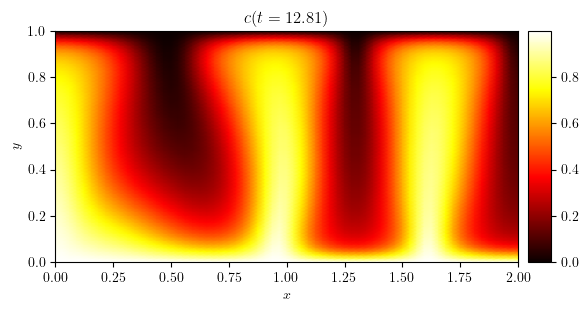

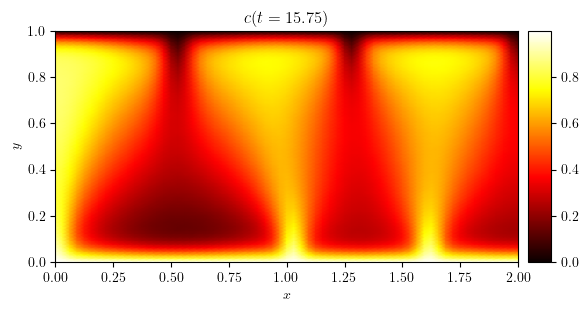

: 

: 

In [ ]:
c = simulation['c']

i_mid = int(0.5 * len(c.series))
time_indices = (0, i_mid,  -1)
for i in time_indices:
    fig, ax = plot_colormap(c.series[i], title=f'$c(t={c.time_series[i]:.2f})$')
    # write(
    #     fig, 
    #     f'{get_ipynb_file_name()}_c(t={c.time_series[i]:.2f})', 
    #     './figures',
    #     file_ext=['pdf', 'png'], 
    #     close=False, 
    #     pickle=False,
    # )

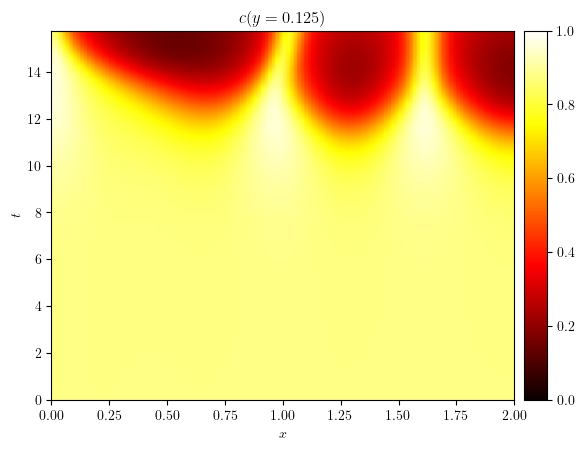

In [ ]:
x, y = grid(c.mesh)

y_index = 8
y_value = y[y_index]
c_spacetime = spacetime_grid(c.series, 'y', y_value)

fig, ax = plot_colormap(
    (x, c.time_series, c_spacetime), 
    aspect='auto',
    x_label='$x$',
    y_label='$t$',
    title=f'$c(y={y_value:.3f})$',
    colorbar=(0, 1),
)
write(
    fig, 
    f'{get_ipynb_file_name()}_c(y={y_value:.3f})', 
    './figures',
    file_ext=['pdf', 'png'], 
    close=False, 
    pickle=False,
)

In [ ]:
slc = slice(0, None, 2)

titles = [f'$c(t={t:.3f})$' for t in c.time_series[slc]]
colorbars = [False] * len(titles)

anim = create_animation(
    plot_colormap,
)(c.series[slc], title=titles, colorbar=colorbars)
write(anim, f'{get_ipynb_file_name()}_c(t)', './figures')